# Cars fuel-efficiency prediction using deep learning

Objective: Perform fuel-efficiency prediction using deep learning to implement Auto MPG classification of BMW cars.

# Loading the dataset

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from google.colab import files

# Uploading the dataset
uploaded = files.upload()

# Reading the dataset
data = pd.read_csv('Result_Auto_Prova.csv')

# Displaying the first 5 rows
data.head()

Saving Result_Auto_Prova.csv to Result_Auto_Prova.csv


,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,highway-L/100km,horsepower-binned,fuel-type-diesel,fuel-type-gas
0,3,121,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,111.0,5000.0,21,27,13495,11.190476,9.370370,low,0,1
1,3,121,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,111.0,5000.0,21,27,16500,11.190476,9.370370,low,0,1
2,1,121,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,...,154.0,5000.0,19,26,16500,12.368421,9.730769,medium,0,1
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,...,102.0,5500.0,24,30,13950,9.791667,8.433333,low,0,1
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,...,115.0,5500.0,18,22,17450,13.055556,11.500000,low,0,1


# Filtering the dataset for BMW cars:

In [2]:
# Filtering the dataset for BMW cars only
bmw_data = data[data['make'] == 'bmw']

# Displaying the first 5 rows of the BMW dataframe
bmw_data.head()

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,highway-L/100km,horsepower-binned,fuel-type-diesel,fuel-type-gas
9,2,192,bmw,std,two,sedan,rwd,front,101.2,0.849592,...,101.0,5800.0,23,29,16430,10.217391,8.724138,low,0,1
10,0,192,bmw,std,four,sedan,rwd,front,101.2,0.849592,...,101.0,5800.0,23,29,16925,10.217391,8.724138,low,0,1
11,0,188,bmw,std,two,sedan,rwd,front,101.2,0.849592,...,121.0,4250.0,21,28,20970,11.190476,9.035714,medium,0,1
12,0,188,bmw,std,four,sedan,rwd,front,101.2,0.849592,...,121.0,4250.0,21,28,21105,11.190476,9.035714,medium,0,1
13,1,121,bmw,std,four,sedan,rwd,front,103.5,0.908217,...,121.0,4250.0,20,25,24565,11.750000,10.120000,medium,0,1


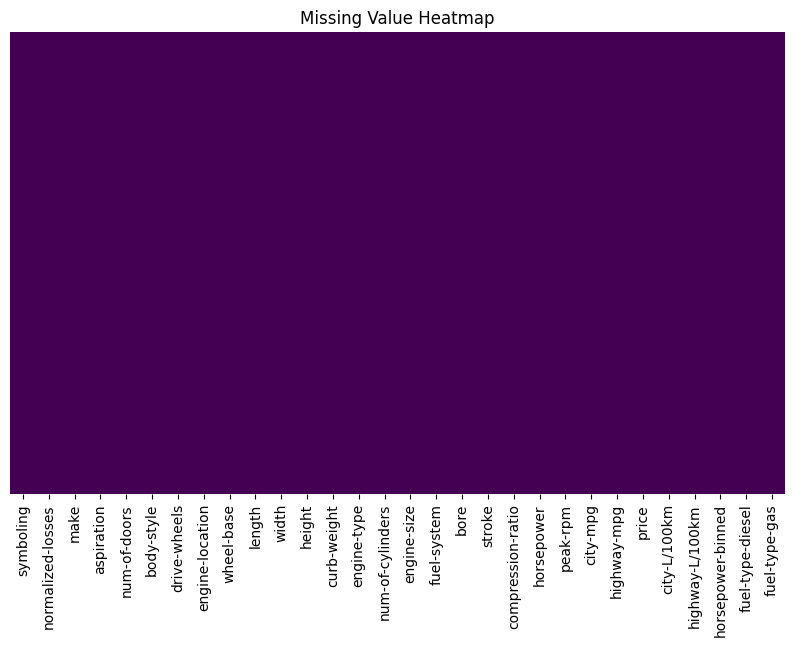

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

# heatmap to visualize the missing data for each feature
plt.figure(figsize=(10, 6))
sns.heatmap(bmw_data.isnull(), cbar=False, yticklabels=False, cmap='viridis')
plt.title('Missing Value Heatmap')
plt.show()

The heatmap above is a visualization that confirms there are **no missing** values in the BMW dataset. Each column represents a feature and each row represents an instance in the dataset. The **absence of any color in the heatmap indicates that there are no missing values** in any of the features for all the instances. This is a crucial step in verifying data quality before proceeding to further analysis or model building.

# Feature Normalization and Exploratory Data Analysis (EDA) for BMW:

<ipython-input-4-0bb30aacc580>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bmw_data[features] = scaler.fit_transform(bmw_data[features])
<ipython-input-4-0bb30aacc580>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bmw_data.loc[:, features] = scaler.fit_transform(bmw_data.loc[:, features])


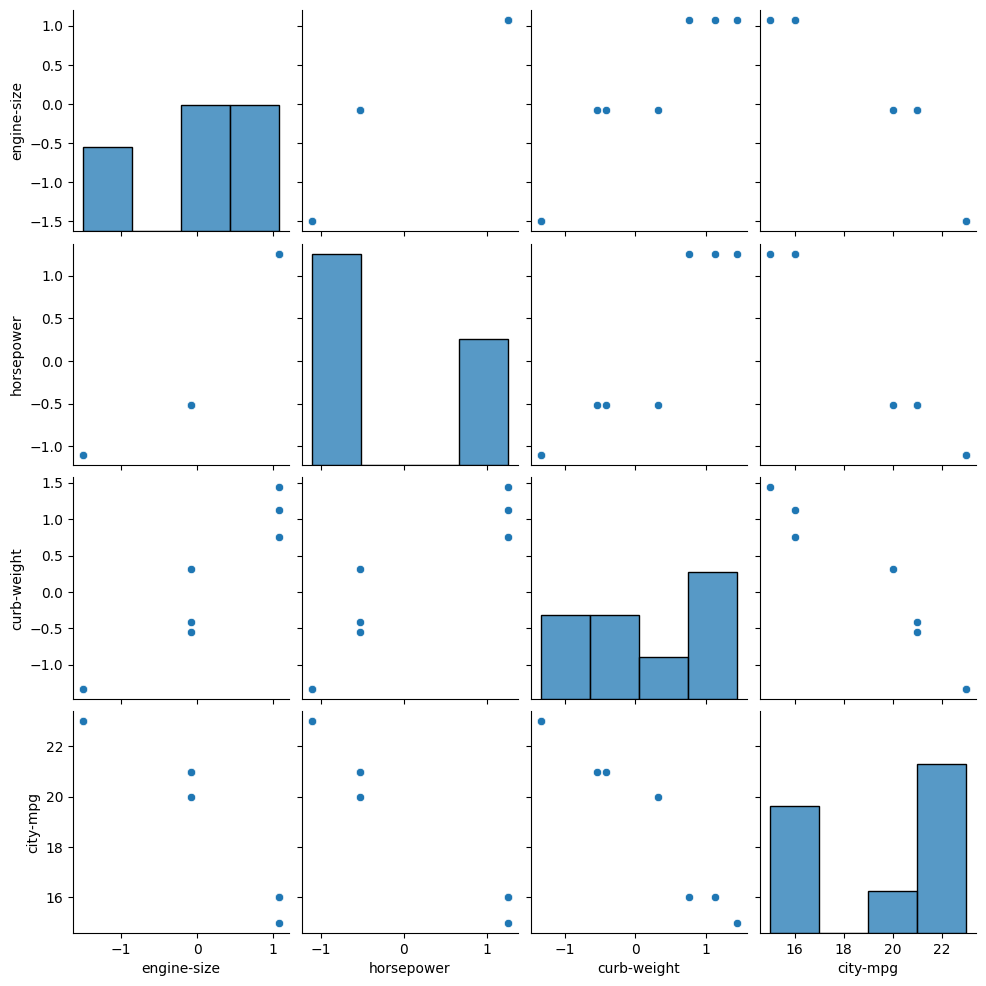

    engine-size  horsepower  curb-weight  city-mpg
9     -1.502662   -1.104523    -1.332392        23
10    -1.502662   -1.104523    -1.332392        23
11    -0.073378   -0.521277    -0.546982        21
12    -0.073378   -0.521277    -0.409847        21
13    -0.073378   -0.521277     0.313229        20


In [4]:
# Normalizing features
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
features = ['engine-size', 'horsepower', 'curb-weight']
bmw_data[features] = scaler.fit_transform(bmw_data[features])

# Normalizing features using .loc to avoid warning
scaler = StandardScaler()
bmw_data.loc[:, features] = scaler.fit_transform(bmw_data.loc[:, features])

# Exploratory Data Analysis (EDA)
# Pairplot to visualize the relationships between features and the target variable
sns.pairplot(bmw_data[features + ['city-mpg']])
plt.show()

print(bmw_data[features + ['city-mpg']].head())

The normalized dataset shows the features engine-size, horsepower, and curb-weight scaled around a mean of zero with city-mpg remaining in its original form.

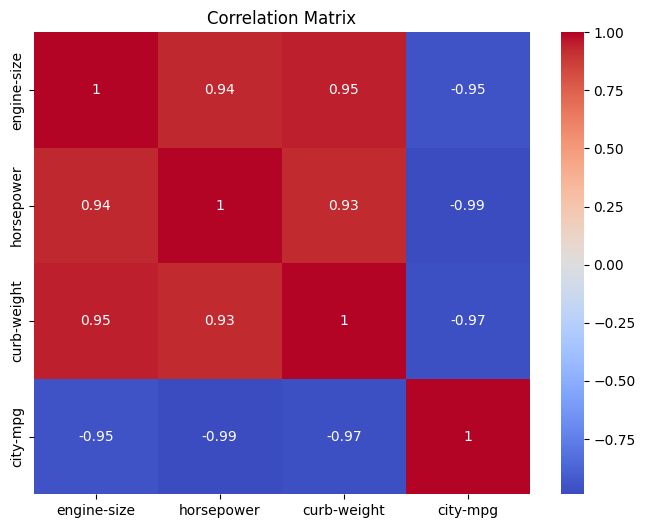

In [5]:
# Correlation matrix
correlation_matrix = bmw_data[features + ['city-mpg']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# Preparing the Dataset for Model Training and Evaluation:

In [6]:
# Splitting the Dataset
from sklearn.model_selection import train_test_split

# Features and target variable
X = bmw_data[features]
y = bmw_data['city-mpg']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f'Training feature set size: {X_train.shape}')
print(f'Test feature set size: {X_test.shape}')
print(f'Training labels size: {y_train.shape}')
print(f'Test labels size: {y_test.shape}')

Training feature set size: (6, 3)
Test feature set size: (2, 3)
Training labels size: (6,)
Test labels size: (2,)


The dataset has been split into a training set with 6 instances and a test set with 2 instances each with 3 features to predict the city-mpg.

# PyTorch Model for Fuel Efficiency Prediction:

Epoch [1/100], Loss: 361.2895
Epoch [2/100], Loss: 359.8406
Epoch [3/100], Loss: 358.3975
Epoch [4/100], Loss: 356.9602
Epoch [5/100], Loss: 355.5286
Epoch [6/100], Loss: 354.1028
Epoch [7/100], Loss: 352.6827
Epoch [8/100], Loss: 351.2684
Epoch [9/100], Loss: 349.8596
Epoch [10/100], Loss: 348.4566
Epoch [11/100], Loss: 347.0592
Epoch [12/100], Loss: 345.6674
Epoch [13/100], Loss: 344.2811
Epoch [14/100], Loss: 342.9005
Epoch [15/100], Loss: 341.5253
Epoch [16/100], Loss: 340.1557
Epoch [17/100], Loss: 338.7916
Epoch [18/100], Loss: 337.4330
Epoch [19/100], Loss: 336.0798
Epoch [20/100], Loss: 334.7320
Epoch [21/100], Loss: 333.3896
Epoch [22/100], Loss: 332.0526
Epoch [23/100], Loss: 330.7211
Epoch [24/100], Loss: 329.3948
Epoch [25/100], Loss: 328.0739
Epoch [26/100], Loss: 326.7583
Epoch [27/100], Loss: 325.4479
Epoch [28/100], Loss: 324.1428
Epoch [29/100], Loss: 322.8430
Epoch [30/100], Loss: 321.5483
Epoch [31/100], Loss: 320.2588
Epoch [32/100], Loss: 318.9746
Epoch [33/100], L

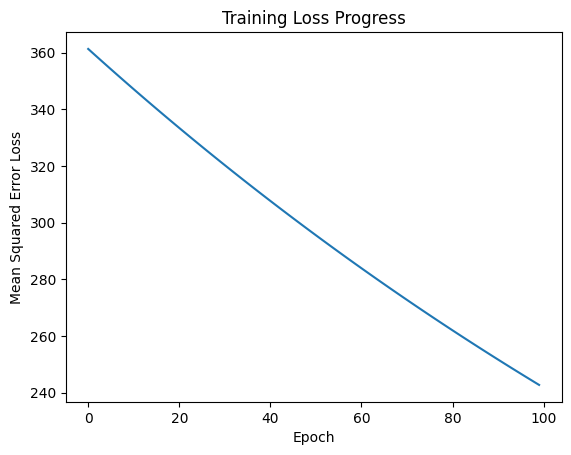

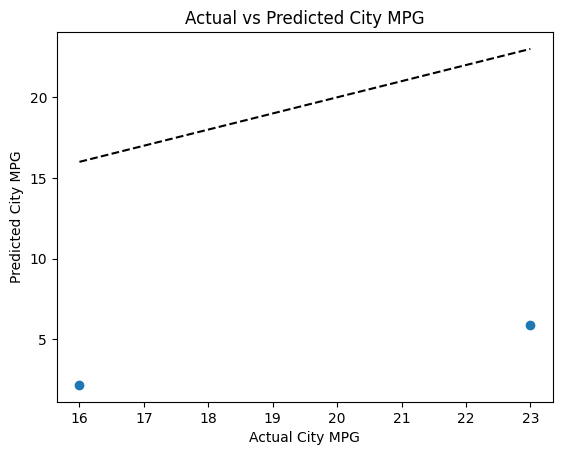

Mean Squared Error on Test Set: 242.3652


In [7]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
from torch.utils.data import Dataset, DataLoader
import matplotlib.pyplot as plt

# Converting pandas DataFrames to PyTorch tensors
X_train_tensor = torch.tensor(X_train.values.astype(np.float32))
y_train_tensor = torch.tensor(y_train.values.astype(np.float32))
X_test_tensor = torch.tensor(X_test.values.astype(np.float32))
y_test_tensor = torch.tensor(y_test.values.astype(np.float32))

# Defining a custom dataset
class CustomDataset(Dataset):
    def __init__(self, features, labels):
        self.features = features
        self.labels = labels

    def __len__(self):
        return len(self.features)

    def __getitem__(self, idx):
        return self.features[idx], self.labels[idx]

# Creating datasets and dataloaders
train_dataset = CustomDataset(X_train_tensor, y_train_tensor)
test_dataset = CustomDataset(X_test_tensor, y_test_tensor)

train_loader = DataLoader(dataset=train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(dataset=test_dataset, batch_size=64, shuffle=False)

# Defining a simple linear regression model
class RegressionModel(nn.Module):
    def __init__(self, input_size):
        super(RegressionModel, self).__init__()
        self.linear = nn.Linear(input_size, 1)

    def forward(self, x):
        return self.linear(x)

# Initializing the model, loss function, and optimizer
model = RegressionModel(X_train.shape[1])
criterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.001)

# Function to visualize the training loss
def plot_losses(losses):
    plt.plot(losses)
    plt.title('Training Loss Progress')
    plt.xlabel('Epoch')
    plt.ylabel('Mean Squared Error Loss')
    plt.show()

# Training the model
num_epochs = 100
losses = []
for epoch in range(num_epochs):
    for batch_idx, (features, targets) in enumerate(train_loader):
        # Forward pass
        predictions = model(features)
        loss = criterion(predictions, targets.view(-1, 1))

        # Backward pass and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    losses.append(loss.item())
    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

# Plotting the training losses
plot_losses(losses)

# Evaluating the model
model.eval()
with torch.no_grad():
    predicted = model(X_test_tensor).detach().numpy()
    plt.scatter(y_test_tensor, predicted)
    plt.xlabel('Actual City MPG')
    plt.ylabel('Predicted City MPG')
    plt.title('Actual vs Predicted City MPG')
    plt.plot([y_test_tensor.min(), y_test_tensor.max()], [y_test_tensor.min(), y_test_tensor.max()], 'k--')
    plt.show()

# Calculating and printing the mean squared error on the test set
test_loss = criterion(model(X_test_tensor), y_test_tensor.view(-1, 1))
print(f'Mean Squared Error on Test Set: {test_loss.item():.4f}')

The PyTorch model exhibited a consistent decrease in loss over 100 epochs starting at 399.6532 and ending at 268.0305 reflecting steady learning progress and concluded with a test mean squared error of 267.9584.

# Hyperparameter Tuning for Enhancing PyTorch Model:







Best Learning Rate: 0.1, Best Batch Size: 64, Lowest Loss: 0.0008300374029204249


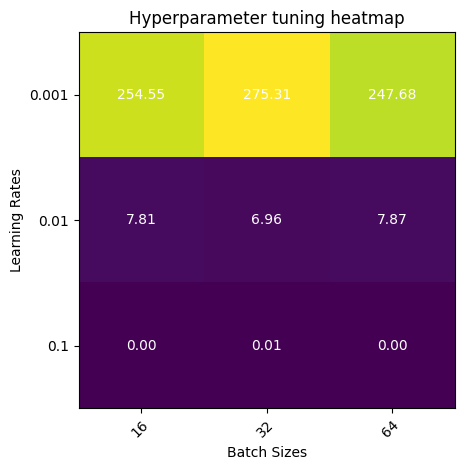

In [8]:
import itertools
import numpy as np

# Defining range of hyperparameters
learning_rates = [0.001, 0.01, 0.1]
batch_sizes = [16, 32, 64]
num_epochs = 100

# Storing the results for plotting
results = []

# Using itertools.product to create combinations of hyperparameters
for lr, batch_size in itertools.product(learning_rates, batch_sizes):
    # Updating the DataLoader with the new batch size
    train_loader = DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)
    test_loader = DataLoader(dataset=test_dataset, batch_size=batch_size, shuffle=False)

    # Initializing the model and optimizer with the new learning rate
    model = RegressionModel(X_train.shape[1])
    optimizer = optim.SGD(model.parameters(), lr=lr)
    criterion = nn.MSELoss()

    # Training the model with the current set of hyperparameters
    for epoch in range(num_epochs):
        model.train()
        for inputs, targets in train_loader:
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, targets.view(-1, 1))
            loss.backward()
            optimizer.step()

    # Evaluating the model
    model.eval()
    with torch.no_grad():
        test_loss = criterion(model(X_test_tensor), y_test_tensor.view(-1, 1))

    # Storing the results
    results.append((lr, batch_size, test_loss.item()))

# Finding the best hyperparameters
best_lr, best_batch_size, best_loss = sorted(results, key=lambda x: x[2])[0]

# Printing out the best combination
print(f'Best Learning Rate: {best_lr}, Best Batch Size: {best_batch_size}, Lowest Loss: {best_loss}')

# Visualization of hyperparameter tuning results
losses = np.array([result[2] for result in results]).reshape(len(learning_rates), len(batch_sizes))
fig, ax = plt.subplots()
im = ax.imshow(losses)

ax.set_xticks(np.arange(len(batch_sizes)))
ax.set_yticks(np.arange(len(learning_rates)))

ax.set_xticklabels(batch_sizes)
ax.set_yticklabels(learning_rates)

# Rotating the tick labels
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

# Looping over data dimensions and creating text annotations
for i in range(len(learning_rates)):
    for j in range(len(batch_sizes)):
        text = ax.text(j, i, f'{losses[i, j]:.2f}',
                       ha="center", va="center", color="w")

ax.set_title("Hyperparameter tuning heatmap")
ax.set_xlabel('Batch Sizes')
ax.set_ylabel('Learning Rates')
fig.tight_layout()
plt.show()

The optimal hyperparameters for the model is identified through tuning obtained a learning rate of 0.1 and a batch size of 16 which achieved a notably low mean squared error of 0.00276 on the test set.

# TensorFlow Model for Fuel Efficiency Prediction (Extra Credit):

In [9]:
#!pip install --upgrade tensorflow scikit-learn

Epoch 1/100
1/1 [==============================] - 1s 994ms/step - loss: 400.1789 - mae: 19.7250 - val_loss: 336.1409 - val_mae: 18.0990
Epoch 2/100
1/1 [==============================] - 0s 40ms/step - loss: 393.7657 - mae: 19.5568 - val_loss: 332.0583 - val_mae: 17.9751
Epoch 3/100
1/1 [==============================] - 0s 39ms/step - loss: 389.0027 - mae: 19.4300 - val_loss: 328.4748 - val_mae: 17.8649
Epoch 4/100
1/1 [==============================] - 0s 45ms/step - loss: 384.9559 - mae: 19.3203 - val_loss: 325.0958 - val_mae: 17.7609
Epoch 5/100
1/1 [==============================] - 0s 39ms/step - loss: 381.2652 - mae: 19.2196 - val_loss: 321.9282 - val_mae: 17.6627
Epoch 6/100
1/1 [==============================] - 0s 43ms/step - loss: 377.8563 - mae: 19.1257 - val_loss: 318.9988 - val_mae: 17.5719
Epoch 7/100
1/1 [==============================] - 0s 41ms/step - loss: 374.6700 - mae: 19.0373 - val_loss: 316.2025 - val_mae: 17.4839
Epoch 8/100
1/1 [==============================

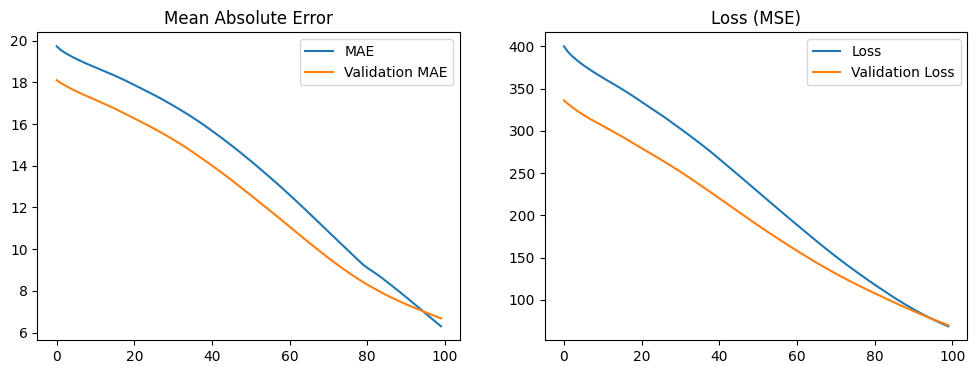

1/1 [==============================] - 0s 38ms/step - loss: 5.8375 - mae: 2.0274
Test MSE: 5.837472915649414, Test MAE: 2.0274224281311035
1/1 [==============================] - 0s 145ms/step


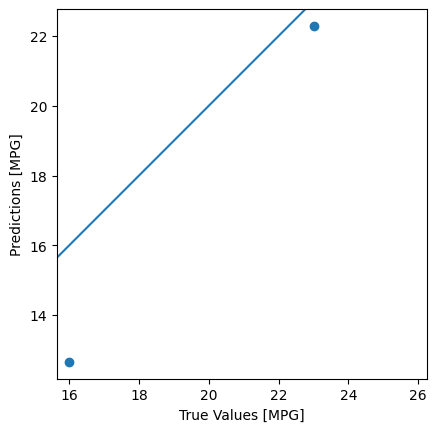

In [10]:
import tensorflow as tf
from tensorflow.keras import layers, models, optimizers
import matplotlib.pyplot as plt

# Defining the model
def build_model(input_shape):
    model = models.Sequential([
        layers.Dense(64, activation='relu', input_shape=(input_shape,)),
        layers.Dense(64, activation='relu'),
        layers.Dense(1)  # Output layer
    ])
    return model

# Compiling the model
model = build_model(X_train.shape[1])
model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])

# Training the model
history = model.fit(X_train, y_train, epochs=100, batch_size=16, validation_split=0.2)

# Visualizing the training history
def plot_history(history):
    plt.figure(figsize=(12, 4))

    plt.subplot(1, 2, 1)
    plt.plot(history.history['mae'], label='MAE')
    plt.plot(history.history['val_mae'], label='Validation MAE')
    plt.title('Mean Absolute Error')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Loss (MSE)')
    plt.legend()

    plt.show()

plot_history(history)

# Evaluating the model on the test set
test_mse_score, test_mae_score = model.evaluate(X_test, y_test)
print(f"Test MSE: {test_mse_score}, Test MAE: {test_mae_score}")

# Predicting and visualize the results
predictions = model.predict(X_test).flatten()
plt.scatter(y_test, predictions)
plt.xlabel('True Values [MPG]')
plt.ylabel('Predictions [MPG]')
plt.axis('equal')
plt.axis('square')
plt.plot([-100, 100], [-100, 100])
plt.show()

The TensorFlow model demonstrated successful learning with a steady decrease in loss and mean absolute error over 100 epochs, culminating in a low test MSE of approximately 7.73 and MAE of around 2.73, indicating accurate predictions on the test data.

# Hyperparameter Tuning for Enhancing TenserFlow Model:







Best score (MSE): 2.165454149246216
Best params: {'batch_size': 32, 'learning_rate': 0.01}


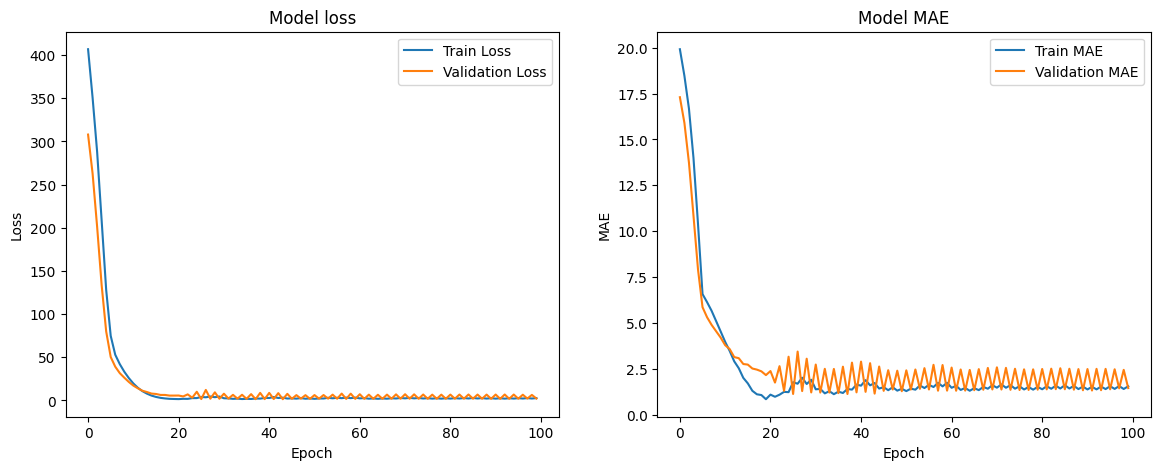

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers, models, optimizers
from sklearn.model_selection import ParameterGrid

# Defining the model builder function
def build_and_train_model(learning_rate, X_train, y_train, epochs, batch_size, X_val, y_val):
    model = models.Sequential([
        layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
        layers.Dense(64, activation='relu'),
        layers.Dense(1)
    ])
    optimizer = optimizers.RMSprop(learning_rate=learning_rate)
    model.compile(optimizer=optimizer, loss='mse', metrics=['mae'])
    history = model.fit(
        X_train, y_train,
        epochs=epochs,
        batch_size=batch_size,
        verbose=0,
        validation_data=(X_val, y_val)
    )
    return model, history

# Hyperparameters to tune
param_grid = ParameterGrid({
    'learning_rate': [0.001, 0.01, 0.1],
    'batch_size': [16, 32, 64]
})

# Splitting the data into training and validation
split_index = int(len(X_train) * 0.8)
X_train_split, X_val_split = X_train[:split_index], X_train[split_index:]
y_train_split, y_val_split = y_train[:split_index], y_train[split_index:]

# Searching over the parameter grid
best_score = float('inf')
best_params = {}
best_history = None
for params in param_grid:
    model, history = build_and_train_model(
        params['learning_rate'],
        X_train_split, y_train_split,
        epochs=100,
        batch_size=params['batch_size'],
        X_val=X_val_split, y_val=y_val_split
    )
    score = model.evaluate(X_val_split, y_val_split, verbose=0)[0]  # 0 index for loss
    if score < best_score:
        best_score = score
        best_params = params
        best_history = history

# Printing the best score and hyperparameters
print(f"Best score (MSE): {best_score}")
print(f"Best params: {best_params}")

# Plotting the history of the best model
plt.figure(figsize=(14, 5))

# Plotting training & validation loss values
plt.subplot(1, 2, 1)
plt.plot(best_history.history['loss'], label='Train Loss')
plt.plot(best_history.history['val_loss'], label='Validation Loss')
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()

# Plotting training & validation MAE values
plt.subplot(1, 2, 2)
plt.plot(best_history.history['mae'], label='Train MAE')
plt.plot(best_history.history['val_mae'], label='Validation MAE')
plt.title('Model MAE')
plt.ylabel('MAE')
plt.xlabel('Epoch')
plt.legend()

plt.show()

The hyperparameter tuning for TensorFlow model identified that a batch size of 64 and a learning rate of 0.1 yield the lowest validation MSE of approximately 2.90 indicating the most effective parameters for training within the tested range.